In [2]:
#
# Get our toolbox ready:
#     pandas ... for our data frames
#     pyplot ... for versatile plots
#    mplot3d ... for 3D capabilities
# matplotlib ... the main toolbox
#      numpy ... for all things numerical
#    seaborn ... a statistical data viz toolkit
#

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline



In [3]:
# 
# Read the CSV files with our datasets into two arrays.
# Files must be in the same directory as this notebook.
#

white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine = pd.read_csv('winequality-red.csv', sep=';')

# 
# Since we are planning to merge the two arrays, we need
# explicit information about red and white wines, so we 
# add a 'wine_type' column to each array and set its 
# values to red and white respectively.
#

red_wine['wine_type'] = 'red'   
white_wine['wine_type'] = 'white'


In [4]:

# 
# We create a descriptive label for wine quality as follows:
#                 ( low,    if quality value <=5
# quality_label = ( medium, if quality value >5, <=7
#                 ( high, if quality value > 7
#
# np.apply with lambda allows us to define a function inside the apply method,
# rather than writing an external function, and then passing it as an argument
# for the apply method.
#


red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' 
                                                          if value <= 5 else 'medium' 
                                                              if value <= 7 else 'high')

white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' 
                                                              if value <= 5 else 'medium' 
                                                                  if value <= 7 else 'high')
#
# Declare 'quality_label' as a categorical data type (for pandas purposes)
#

red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
                                           categories=['low', 'medium', 'high'])
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], 
                                             categories=['low', 'medium', 'high'])



In [7]:
#
# We are done transforming the data and we can now merge red and white wine datasets
# into a new single data frame.
#

wines = pd.concat([red_wine, white_wine])

# 
# If we are not sure about the random order of the data in the new data frame,
# we can re-shuffle them just to randomize data points. And since the new data
# frame has the red wines first and the white wines next, as a result of the
# concatenation above, the order is not random.
#
# The sample method with select a fraction of the data frame. To sample 100% of the
# data frame we set frac=1. 
#
# random_state is a seed for the RNG used for sampling.
#
#reset_index(drop=True) resets the index to the default integer index.
#
#wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)
#wines

In [8]:
#
# Descriptive statistics: we look at a few specific properties of the wines between reds and whites.
# There properties are listed in array subset_attributes. The array can be
# as expansive to include every attribute, or moderately expansive like
# subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']
# or something with three attributes like:
# subset_attributes = [sulphates', 'alcohol', 'quality']
#
# We round variables to two decimal digits for uniform presentation and we use
# .describe() to generate descriptive statistics that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.
#
# Notice that we use the individual red and white wine arrays for this analysis, then
# we concatenate the .describe() result along the 1-axis (ie header row) and 
# superimpose an additional header with labels for white and red wine statistics.
#

subset_attributes = ['sulphates', 'alcohol', 'quality']

rs = round(red_wine[subset_attributes].describe(),2)
ws = round(white_wine[subset_attributes].describe(),2)
pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])

Red Wine Statistics                   White Wine Statistics           \
                sulphates  alcohol  quality             sulphates  alcohol   
count             1599.00  1599.00  1599.00               4898.00  4898.00   
mean                 0.66    10.42     5.64                  0.49    10.51   
std                  0.17     1.07     0.81                  0.11     1.23   
min                  0.33     8.40     3.00                  0.22     8.00   
25%                  0.55     9.50     5.00                  0.41     9.50   
50%                  0.62    10.20     6.00                  0.47    10.40   
75%                  0.73    11.10     6.00                  0.55    11.40   
max                  2.00    14.90     8.00                  1.08    14.20   

                
       quality  
count  4898.00  
mean      5.88  
std       0.89  
min       3.00  
25%       5.00  
50%       6.00  
75%       6.00  
max       9.00

In [9]:
#
# Descriptive statistics: we look at a few specific properties of the wines between low, 
# medium, and high quality wines, regardless of color. For this analysis we use the 
# concatenated array wines[]. 
#
# The properties we are interested in, are listed in array subset_attributes[]
#
# We round variables to two decimal digits for uniform presentation and we use
# .describe() to generate descriptive statistics that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.
#
# We concatenate row headers for low, medium, and high quality wines.
#
# The notation below is very compact, to demonstrate the efficiency of pandas and matplotlib
#
# wines['quality_label'] == 'low' is a selection filter that will return only those 
# rows in the wine[] array where quality_labe=low. We apply this filter as a method to
# the object of interest, i.e.,
# list of low quality wines = object.filter
# where,
# object = wines
# filter = wines['quality_label'] == 'low',
# then we apply our descriptive stats:
# round(object.filter.[subset_attributes].describe(),2)
#


subset_attributes = ['pH', 'quality']
ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(),2)
ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(),2)
hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(),2)
pd.concat([ls, ms, hs], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

Low Quality Wine          Medium Quality Wine           \
                    pH  quality                  pH  quality   
count          2384.00  2384.00             3915.00  3915.00   
mean              3.21     4.88                3.22     6.28   
std               0.16     0.36                0.16     0.45   
min               2.74     3.00                2.72     6.00   
25%               3.11     5.00                3.11     6.00   
50%               3.20     5.00                3.21     6.00   
75%               3.31     5.00                3.33     7.00   
max               3.90     5.00                4.01     7.00   

      High Quality Wine          
                     pH quality  
count            198.00  198.00  
mean               3.23    8.03  
std                0.16    0.16  
min                2.88    8.00  
25%                3.13    8.00  
50%                3.23    8.00  
75%                3.33    8.00  
max                3.72    9.00

Notice that the average value of pH above doesn't change "dramatically" between low, medium and high quality wines. Is there another measurement that shows more pronounced differences between the three quality groups? Try exploring on your own by replacing 'TRYANOTHERVARIABLE' below with a different measurement from the data frame.

In [13]:
subset_attributes = ['TRYANOTHERVARIABLE', 'quality']
ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(),2)
ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(),2)
hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(),2)
pd.concat([ls, ms, hs], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

Low Quality Wine          Medium Quality Wine           \
         fixed acidity  quality       fixed acidity  quality   
count          2384.00  2384.00             3915.00  3915.00   
mean              7.33     4.88                7.16     6.28   
std               1.27     0.36                1.31     0.45   
min               4.20     3.00                3.80     6.00   
25%               6.50     5.00                6.40     6.00   
50%               7.10     5.00                6.90     6.00   
75%               7.80     5.00                7.60     7.00   
max              15.90     5.00               15.60     7.00   

      High Quality Wine          
          fixed acidity quality  
count            198.00  198.00  
mean               6.85    8.03  
std                1.14    0.16  
min                3.90    8.00  
25%                6.20    8.00  
50%                6.80    8.00  
75%                7.30    8.00  
max               12.60    9.00

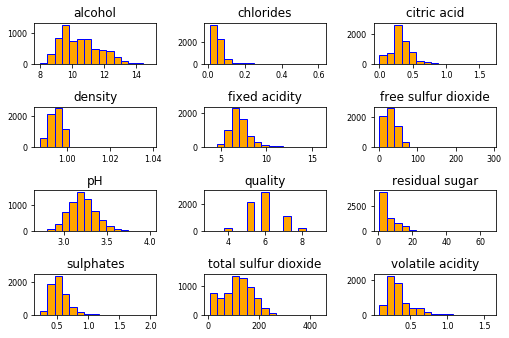

In [10]:
#
# pandas.hist() plots histograms for every dimension (column) in the data frame.
# We can limit the dimensions via a column=[...] argument, e.g.,
# .hist( ..., column=['alcohol', 'pH'], ...) 
#
# tight_layout() makes sure that the plots appear neatly within the boundaries
# of the figure, without us having to adjust everything manually.
#

wines.hist(bins=15, color='orange', edgecolor='blue', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

<a list of 15 Patch objects>

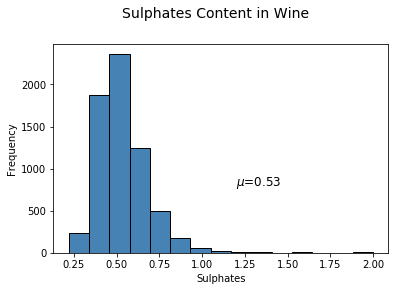

In [11]:
#
# Take a closer look at sulphates -- as an example for a histogram
#

# 
# First define a 600x400 figure object
#
fig = plt.figure(figsize = (6,4))

# 
# Add a centered title to the figure
#
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)

#
# Adjust the figure to make sure center titled is not cutting
# into any plots
#
fig.subplots_adjust(top=.85, wspace=0.3)

# 
# Sub plots are placed on a NxM grid, at position 1,2,...,NM. This information
# comes in the .add_subplot method as arguments (N,M,k), 1<=k<=NM, so 
# .add_subplot(1,1,1) is a 1x1 grid of plots, with our plot at position 1 (trivial)/
#

sulfates_plot = fig.add_subplot(1,1,1) 

#
# Label and x and y axes of our subplot
#
sulfates_plot.set_xlabel("Sulphates")
sulfates_plot.set_ylabel("Frequency") 

#
# A bit of LaTeX makes things fancy!
#
sulfates_plot.text(1.2, 800, r'$\mu$='+str(round(wines['sulphates'].mean(),2)), 
         fontsize=12)

freq, bins, patches = sulfates_plot.hist(wines['sulphates'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)

 
patches

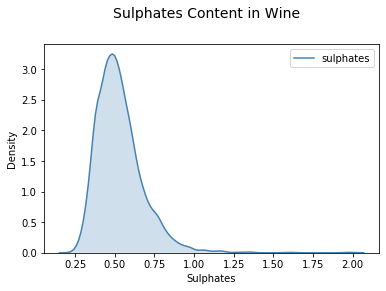

In [12]:
# 
# from histogram to distribution function
#

#
# Define figure area, fonts, etc
#
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
sulfates_fit = fig.add_subplot(1,1, 1)
sulfates_fit.set_xlabel("Sulphates")
sulfates_fit.set_ylabel("Density") 

#
# kdeplot() is a Seaborn tool that draws a kernel density estimation 
# for a distribution, using a Gaussian kernel by default 
# K(u)= a * exp (-0.5*u^2)
#
sns.kdeplot(wines['sulphates'], ax=sulfates_fit, shade=True, color='steelblue')